In [1]:
from gambler_ruin import Simulation as gambler_ruin_simulation

Two players, Angelo and Leonardo, repeatedly toss an (unfair) coin.  
Angelo starts with 2 dollars, Leonardo with 1 dollar. 
For heads, Angelo wins one dollar from Leonardo, for tails, Leonardo wins one dollar from Angelo.
The game continues until one player is bankrupt.

Here, we simulate the game.


The estimate of the probability of Angelo winning (with its confidence interval) is: 

In [2]:
p = 2/3
sim = gambler_ruin_simulation(p)

"""
Define here the statistical parameters
"""
CONFIDENCE = 0.95
SAMPLES = 10000

results = sim.get_confidence_interval(CONFIDENCE, SAMPLES)

The sample proportion is:  0.5739
The  95.0 % confidence interval for the mean of the population is: [ 0.5642078088553343 0.5835921911446657 ]


Next, we analyze for several values of p what happens, as we know, from the analytical study done in the .pdf file that $p = \frac{1}{2}$ is the critical value for which Angelo starts losing almost surely. 

The sample proportion is:  0.0163
The  95.0 % confidence interval for the mean of the population is: [ 0.013818163148326545 0.018781836851673454 ]
The sample proportion is:  0.0788
The  95.0 % confidence interval for the mean of the population is: [ 0.07351934050509668 0.08408065949490331 ]
The sample proportion is:  0.336
The  95.0 % confidence interval for the mean of the population is: [ 0.32674232843133794 0.3452576715686621 ]
The sample proportion is:  0.5719
The  95.0 % confidence interval for the mean of the population is: [ 0.5622020318559016 0.5815979681440984 ]
The sample proportion is:  0.6979
The  95.0 % confidence interval for the mean of the population is: [ 0.688900465362466 0.706899534637534 ]
The sample proportion is:  0.7606
The  95.0 % confidence interval for the mean of the population is: [ 0.7522364949284563 0.7689635050715438 ]
The sample proportion is:  0.8083
The  95.0 % confidence interval for the mean of the population is: [ 0.8005848311211883 0.81601516887881

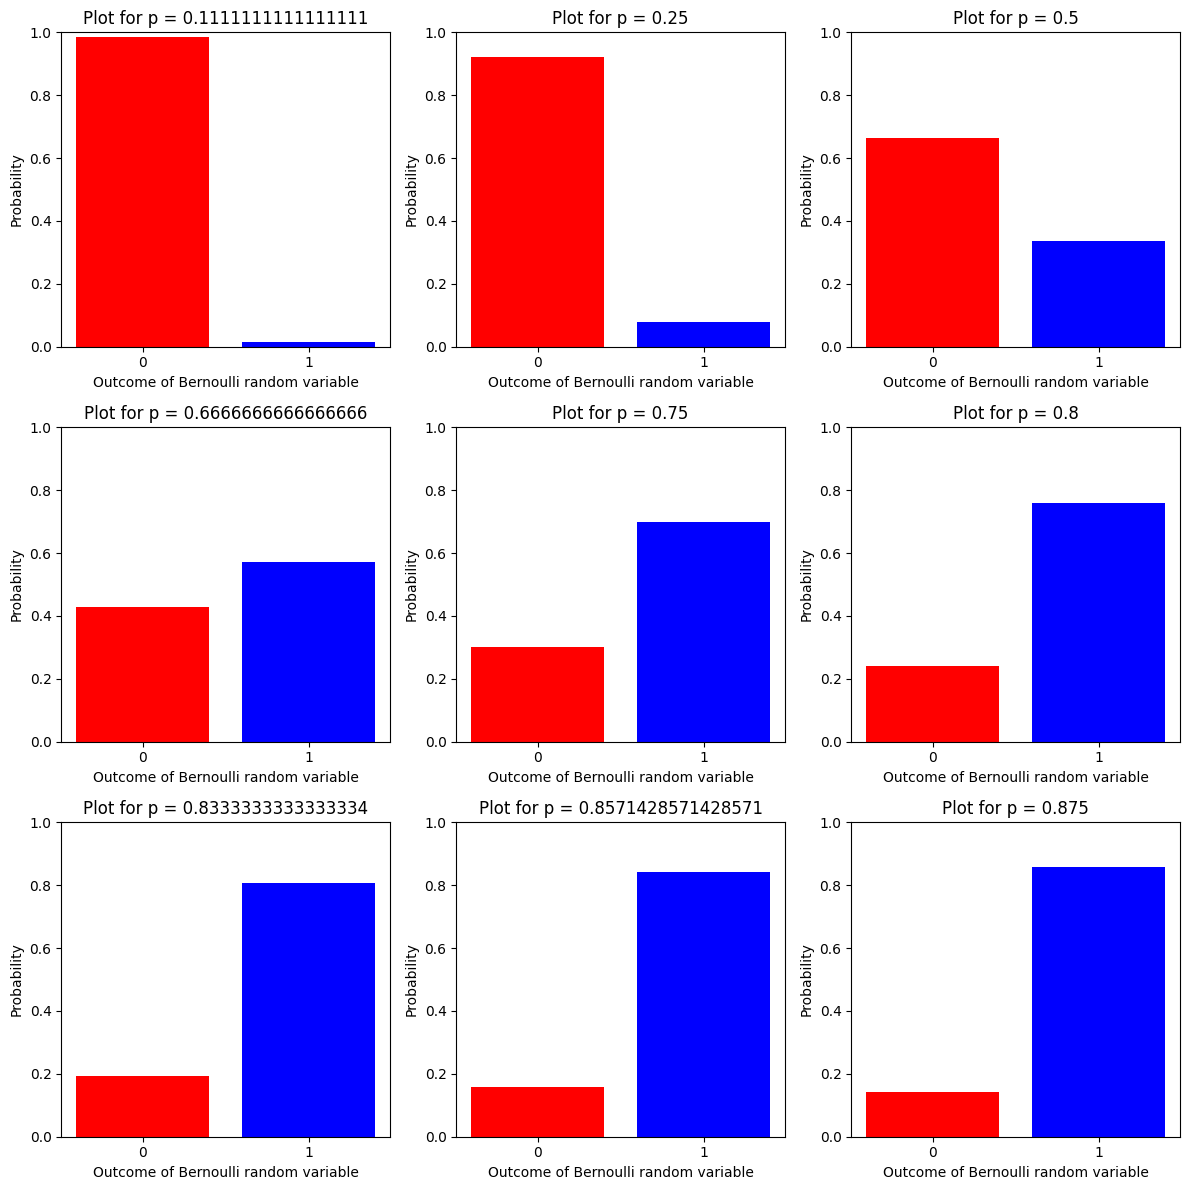

In [3]:
import matplotlib.pyplot as plt
probs = [1/9, 1/4, 1/2, 2/3, 3/4, 4/5, 5/6, 6/7, 7/8]
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

for i, p in enumerate(probs):
    sim_p = gambler_ruin_simulation(p)
    observations_p = sim_p.get_confidence_interval(CONFIDENCE, SAMPLES)
    row = i // 3
    col = i % 3
    labels = ['0', '1']
    ones = sum(observations_p)
    counts = [(SAMPLES - ones) / SAMPLES, ones / SAMPLES]
    axes[row, col].bar(labels, counts, color = ['red', 'blue'])
    axes[row, col].set_xlabel('Outcome of Bernoulli random variable')
    axes[row, col].set_ylabel('Probability')
    axes[row, col].set_title(f'Plot for p = {p}')
    axes[row, col].set_ylim([0, 1])
plt.tight_layout()
plt.show()


Now, we analyze a more general case, when Angelo and Leonardo start with an arbitrary amount of money, respectively "angelo_start" and "leonardo_start".

In [4]:
from gambler_ruin import Generalized_Simulation as general_simulation

We see that this case includes the simpler one we studied above. 
Indeed, this is just a general random walk problem with two absorbing barriers. 
In the previous we had a finite number of states between these two barriers (i.e. states "0" and "1"), now this number depends on the values of "angelo_start" and "leonardo_start".

In [5]:
p = 2/3
angelo_start = 1
leonardo_start = 2
sim = general_simulation(p, angelo_start, leonardo_start)

p_hat = sim.get_confidence_interval(CONFIDENCE, SAMPLES)

The sample proportion, for p =  0.6666666666666666 , angelo_start =  1 , leonardo_start =  2  is:  0.5644
The  95.0 % confidence interval for the mean of the population is: [ 0.5546818067907716 0.5741181932092284 ]


Just to play around with it a little bit, we keep fixed p and we change some values of "angelo_start" and "leonardo_start", while keeping their sum constant, in order to see how the probability of Angelo winning changes in relation to his starting position being of favour or not.
These results are confirmed by the closed-form analytical solution (see more details in the .pdf file).

The sample proportion, for p =  0.6666666666666666 , angelo_start =  0 , leonardo_start =  10  is:  0.0
The  95.0 % confidence interval for the mean of the population is: [ 0.0 0.0 ]
The sample proportion, for p =  0.6666666666666666 , angelo_start =  1 , leonardo_start =  9  is:  0.4979
The  95.0 % confidence interval for the mean of the population is: [ 0.48810026651209265 0.5076997334879074 ]
The sample proportion, for p =  0.6666666666666666 , angelo_start =  2 , leonardo_start =  8  is:  0.7457
The  95.0 % confidence interval for the mean of the population is: [ 0.7371650035924375 0.7542349964075625 ]
The sample proportion, for p =  0.6666666666666666 , angelo_start =  3 , leonardo_start =  7  is:  0.8784
The  95.0 % confidence interval for the mean of the population is: [ 0.8719943819091622 0.8848056180908377 ]
The sample proportion, for p =  0.6666666666666666 , angelo_start =  4 , leonardo_start =  6  is:  0.9391
The  95.0 % confidence interval for the mean of the population is

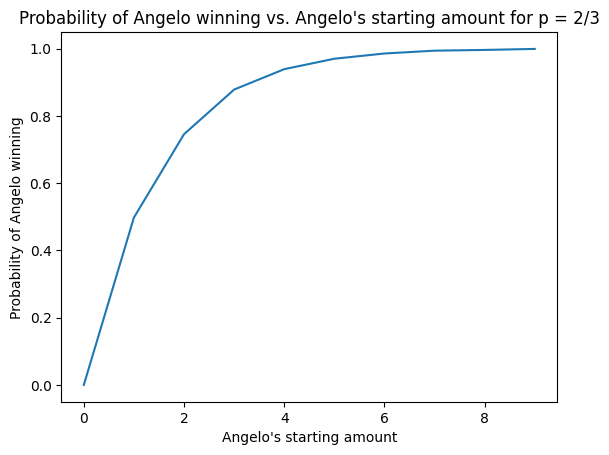

In [6]:
sum = 10
angelo_starts = []
prob_angelo_winning = []
for i in range(sum):
    angelo_start = i
    angelo_starts.append(angelo_start)
    leonardo_start = sum - i
    sim = general_simulation(p, angelo_start, leonardo_start)
    p_hat = sim.get_confidence_interval(CONFIDENCE, SAMPLES)
    prob_angelo_winning.append(p_hat)


plt.plot(angelo_starts, prob_angelo_winning)
plt.xlabel('Angelo\'s starting amount')
plt.ylabel('Probability of Angelo winning')
plt.title('Probability of Angelo winning vs. Angelo\'s starting amount for p = 2/3')
plt.show()